In [2]:
import importlib.util
import sys

# Define the file path
file_path = r"C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\HRDiagram.py"

# Load the module
spec = importlib.util.spec_from_file_location("HRDiagram", file_path)
HRDiagram = importlib.util.module_from_spec(spec)
sys.modules["HRDiagram"] = HRDiagram
spec.loader.exec_module(HRDiagram)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import h5py
from matplotlib.pyplot import figure
from scipy import stats
from scipy import stats
from scipy.stats import skewnorm
from HRDiagram import color_map_HR
color_map_HR

ModuleNotFoundError: No module named 'HRDiagram'

In [7]:
# functions for making all of the graphs, saves them all with file names corrpsonding to the var used and conditons

# color_map_HR (variable, name_of_var, Log1 = 'F', S_R = 'T', minR = 1.5, maxR = 6.5)
#                
# variable = name of var in column to use for color
# name_of_var = variable name to be displayed  on the color bar
# log1 = whether or not to log it 
# S_R = whether or not to use the star radius, if not using one, replace with number to use for size
# minR = minimum y limit
# maxR = max y limit

import matplotlib.pyplot as plt

def color_map_HR (DB, variable, name_of_var, title, saveLoc, Log1 = 'F', S_R = 'T', minR = 1.5, maxR = 6.5, ylimit = 'T', style = 'dark_background'):
    plt.figure(figsize = (8,8))
    cm = plt.colormaps['RdYlBu']  #This is the color map for the stars

    if S_R == 'T':
        r_dot= 10 ** DB['S2_log_R']
        plt.suptitle("Size of dot corresponds to Donor star radius", fontsize=10, family="monospace", color='.5')
    else:
        r_dot = S_R
        
    plt.style.use(style) #graph style

    # assings axis
    Temp = np.log10((((10 ** DB['S2_log_L'])/(10 ** DB['S2_log_R'])**2)**.25) * 5772)
  
    Lum = DB['S2_log_L']

    # binds the color of the scatter points to the x location (temp) of the star
    if Log1 == 'T':
        c = np.log10(DB[variable])
    else:
        c = (DB[variable])
    colors = c

    # labels
    plt.title(title)
    plt.xlabel(r'$log_{10}$ Temperature [K]')
    plt.ylabel(r'$log_{10}$ Luminosity [$L_{\odot}$]')
    
    if ylimit == 'T':
        plt.ylim(minR, maxR)
    # axis scaling
    #plt.xscale('log')
    #plt.yscale('log')

    #scatter points. "cmap" is setting the colormap to use, "c" is setting the color itself (based on location), "s" is setting the size of the dot based off of star radii
    plt.scatter(Temp, Lum, cmap = cm, c = colors, s = r_dot)
    #set limits of graph (tada much better funciton then redefining limits manually)
    plt.gca().invert_xaxis()

    # color bar stuff
    cbar = plt.colorbar(orientation='vertical', label = name_of_var) #sets the colorbar to be horizontal instead of default
    
    #cbar.ax.invert_xaxis() #invert the color bar  (to match the inverted x scaling)
    #cbar.set_ticks([np.min(c),numpy.median,np.max(c),]) # remove the annoying ticks and labels
    if S_R == 'T':
        S_R_STR = str(S_R)
    else:
        S_R_T = int(S_R)
        S_R_STR = str(S_R_T) 
    F_Name = saveLoc, title, name_of_var, 'log10', Log1, 'star radius', S_R_STR
    F_Name_str = ' '.join(F_Name)
    print(F_Name_str)
    plt.savefig(F_Name_str, dpi=200)

In [58]:
def MasterGrapher(db=db, SaveLoc=SaveLoc, Title = 'Default', g1= 'T', g1fit='T', g2= 'T', g3= 'T', g4= 'T', g5= 'T', g6 = 'T'):
    
    #Graph 1
    if g1 == 'T':
        FilteredDB = db[db['eccentricity'] != 0]


        data = FilteredDB['eccentricity']
        # Fit the skew normal distribution to the data

        fig1 = plt.figure()
        # Plot histogram
        plt.hist(data, bins=75, density=True, alpha=0.6, color='blue', label="Histogram")

        # Plot fitted curve
        if g1fit == 'T':
            shape, loc, scale = skewnorm.fit(data)
            x = np.linspace(min(data), max(data), 1000)
            pdf = skewnorm.pdf(x, shape, loc, scale)  # Compute PDF values
            plt.plot(x, pdf, 'r-', label="Fitted Eccentricity Distribution", linewidth=2, linestyle='dashed')

        # Labels and legend
        plt.xlabel("Eccentricity")
        plt.ylabel("Density")
        plt.title(Title +' '+  'Eccentricity Distribution' )
        if g1fit == 'T':
            plt.legend()
        plt.savefig(SaveLoc + Title + ' ' + 'Eccentricty Distribution' + '.png')
        plt.close(fig1)
    
    if g2 == 'T':
        fig2 = plt.figure()
        plt.hist(db['S2_mass'], bins=40)
        plt.title('Star Two Mass Distribution in' + ' ' + Title)
        plt.xlabel('Star Two Mass $M_{\odot}$ ')
        plt.ylabel('Quanity')
        plt.savefig(SaveLoc + Title + ' ' +'Star Two Mass Distribution' + '.png')
        plt.close(fig2)

    if g3 == 'T':
        color_map_HR(DB = db, variable= 'S2_mass', name_of_var='Star Two Mass', title=Title, saveLoc=SaveLoc, ylimit='F', style='default')

<>:35: SyntaxWarning: invalid escape sequence '\o'
<>:35: SyntaxWarning: invalid escape sequence '\o'
C:\Users\iatpuser\AppData\Local\Temp\ipykernel_3352\3178637211.py:35: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Star Two Mass $M_{\odot}$ ')


C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\graphs\\ Contact binaries Star Two Mass log10 F star radius T


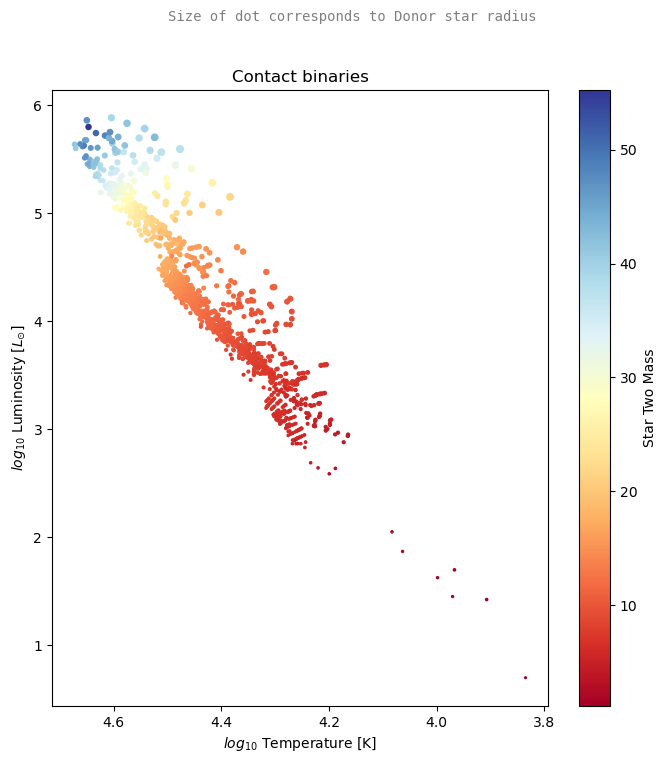

In [60]:
contact = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\data\contact.csv', low_memory=False)
SaveLoc = r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\graphs\\'

# contact
MasterGrapher(contact, SaveLoc, 'Contact binaries', g1fit = 'F', g1='F')

In [45]:
# functions for making all of the graphs, saves them all with file names corrpsonding to the var used and conditons

# color_map_HR (variable, name_of_var, Log1 = 'F', S_R = 'T', minR = 1.5, maxR = 6.5)
#                
# variable = name of var in column to use for color
# name_of_var = variable name to be displayed  on the color bar
# log1 = whether or not to log it 
# S_R = whether or not to use the star radius, if not using one, replace with number to use for size
# minR = minimum y limit
# maxR = max y limit

plt.style.use('dark_background') #graph style

def color_map_HR (DB, variable, name_of_var, title, saveLoc, Log1 = 'F', S_R = 'T', minR = 1.5, maxR = 6.5, ylimit = 'T'):
    plt.figure(figsize = (8,8))
    cm = plt.colormaps['RdYlBu']  #This is the color map for the stars

    if S_R == 'T':
        r_dot= 10 ** DB['S2_log_R']
        plt.suptitle("Size of dot corresponds to Donor radius", fontsize=10, family="monospace", color='.5')
    else:
        r_dot = S_R
        
    #L = R2 T4

    # assings axis
    Temp = np.log10((((10 ** DB['S2_log_L'])/(10 ** DB['S2_log_R'])**2)**.25) * 5772)
  
    Lum = DB['S2_log_L']

    # binds the color of the scatter points to the x location (temp) of the star
    if Log1 == 'T':
        c = np.log10(DB[variable])
    else:
        c = (DB[variable])
    colors = c

    # labels
    plt.title(title)
    plt.xlabel(r'$log_{10}$ Temperature [K]')
    plt.ylabel(r'$log_{10}$ Luminosity [$L_{\odot}$]')
    
    if ylimit == 'T':
        plt.ylim(minR, maxR)
    # axis scaling
    #plt.xscale('log')
    #plt.yscale('log')

    #scatter points. "cmap" is setting the colormap to use, "c" is setting the color itself (based on location), "s" is setting the size of the dot based off of star radii
    plt.scatter(Temp, Lum, cmap = cm, c = colors, s = r_dot)
    #set limits of graph (tada much better funciton then redefining limits manually)
    plt.gca().invert_xaxis()

    # color bar stuff
    cbar = plt.colorbar(orientation='vertical', label = name_of_var) #sets the colorbar to be horizontal instead of default
    
    #cbar.ax.invert_xaxis() #invert the color bar  (to match the inverted x scaling)
    #cbar.set_ticks([np.min(c),numpy.median,np.max(c),]) # remove the annoying ticks and labels
    if S_R == 'T':
        S_R_STR = str(S_R)
    else:
        S_R_T = int(S_R)
        S_R_STR = str(S_R_T) 
    F_Name = saveLoc, title, variable, 'log10', Log1, 'star radius', S_R_STR
    F_Name_str = ' '.join(F_Name)
    print(F_Name_str)
    plt.savefig(F_Name_str, dpi=200)
    plt.style.use('default')

C:\Users\iatpuser\Desktop\Code\Honors Independent Study\graphs\\ HR Diagram of Donor Star in Low Mass X-ray Binaries S2_mass log10 F star radius T


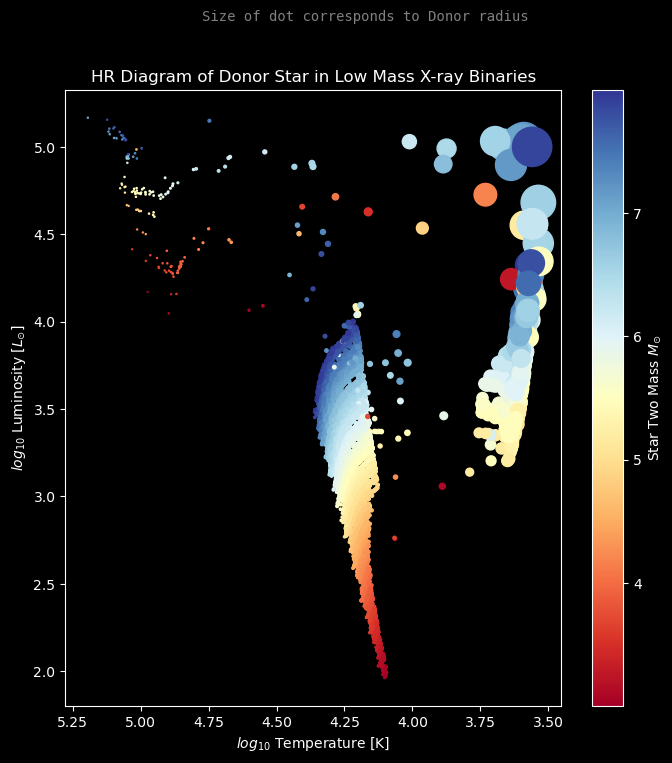

In [46]:
color_map_HR(LMXB,'S2_mass', 'Star Two Mass $M_{\odot}$','HR Diagram of Donor Star in Low Mass X-ray Binaries', saveLoc = r'C:\Users\iatpuser\Desktop\Code\Honors Independent Study\graphs\\', Log1 = 'F', S_R = 'T', ylimit = 'F', minR = 1.5, maxR = 6.5)